# Wine_cleaning

In [51]:
# Import dependencies 
import pandas as pd
import unidecode

In [52]:
# Import data
wine_data_df = pd.read_csv("Data/winemag-data-130k-v2.csv")  
print(wine_data_df.shape)
wine_data_df.head()

(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Select and keep only US data

In [53]:
# Only keep rows where country = US
US_wine_data_df = wine_data_df.loc[wine_data_df["country"] == "US"]
print(US_wine_data_df.shape)
US_wine_data_df.head()

(54504, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [55]:
# Drop columns that are not useful: Unnamed: 0, country, taster_name, taster_twitter_handle
US_wine_data_df = US_wine_data_df.drop(columns=["Unnamed: 0", "designation", "region_2","country","taster_name", "taster_twitter_handle"], axis=1)

# Keep California, Washington, and Oregon
US_wine_data_df = US_wine_data_df.loc[US_wine_data_df.province.isin(["California","Washington", "Oregon"])]
print(US_wine_data_df.shape)
US_wine_data_df.head()

KeyError: "['Unnamed: 0' 'designation' 'region_2' 'country' 'taster_name'\n 'taster_twitter_handle'] not found in axis"

In [64]:
WestCoast_wine_data = US_wine_data_df
WestCoast_wine_data.head()

,description,points,price,province,region_1,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou


## Evaluate data and clean

In [94]:
# Clean winery and variety column
winery_test = WestCoast_wine_data['winery'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
variety_test = WestCoast_wine_data['variety'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
title_test = WestCoast_wine_data['title'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
description_test = WestCoast_wine_data['description'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [95]:
winery_df = pd.DataFrame({'winery_clean':winery_test,'variety_clean':variety_test, 
                          'title_clean':title_test,  'description_clean':description_test})
winery_df

,winery_clean,variety_clean,title_clean,description_clean
2,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and..."
4,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
10,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
12,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,"Slightly reduced, this wine offers a chalky, t..."
14,Mirassou,Chardonnay,Mirassou 2012 Chardonnay (Central Coast),Building on 150 years and six generations of w...
...,...,...,...,...
129945,Birichino,Chenin Blanc,Birichino 2013 Jurassic Park Vineyard Old Vine...,Hailing from one of the more popular vineyards...
129949,Flora Springs,Chardonnay,Flora Springs 2013 Barrel Fermented Chardonnay...,There's no bones about the use of oak in this ...
129950,Hendry,Zinfandel,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),This opens with herbaceous dollops of thyme an...
129952,Houdini,Zinfandel,Houdini 2011 Zinfandel (Chiles Valley),This Zinfandel from the eastern section of Nap...


In [96]:
WestCoast_wine_data_clean = WestCoast_wine_data.merge(winery_df, how = 'inner', left_index=True, right_index=True)
WestCoast_wine_data_clean.head()

,description,points,price,province,region_1,title,variety,winery,winery_clean,variety_clean,title_clean,description_clean
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and..."
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,"Slightly reduced, this wine offers a chalky, t..."
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,Mirassou,Chardonnay,Mirassou 2012 Chardonnay (Central Coast),Building on 150 years and six generations of w...


In [99]:
WestCoast_wine_data_clean['title_clean'].tolist()

['Rainstorm 2013 Pinot Gris (Willamette Valley)',
 "Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)",
 'Kirkland Signature 2011 Mountain Cuvee Cabernet Sauvignon (Napa Valley)',
 'Louis M. Martini 2012 Cabernet Sauvignon (Alexander Valley)',
 'Mirassou 2012 Chardonnay (Central Coast)',
 'Acrobat 2013 Pinot Noir (Oregon)',
 'Bianchi 2011 Signature Selection Merlot (Paso Robles)',
 'Castello di Amorosa 2011 King Ridge Vineyard Pinot Noir (Sonoma Coast)',
 'Clarksburg Wine Company 2010 Chenin Blanc (Clarksburg)',
 'Envolve 2010 Puma Springs Vineyard Red (Dry Creek Valley)',
 'Envolve 2011 Sauvignon Blanc (Sonoma Valley)',
 'Erath 2010 Hyland Pinot Noir (McMinnville)',
 'Hawkins Cellars 2009 Pinot Noir (Willamette Valley)',
 'Robert Hall 2011 Sauvignon Blanc (Paso Robles)',
 'The White Knight 2011 Riesling (Lake County)',
 'RustRidge 2010 Estate Bottled Chardonnay (Napa Valley)',
 'Souverain 2010 Chardonnay (North Coast)',
 'Mellisoni 2014 Malbec (Columb

In [68]:
test = []

for x in winery_test:
    if "cluse" in x:
        test.append(x)

print(test)

['Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse', 'Ecluse']


In [100]:
# Drop duplicate columns

WestCoast_wine_data_duplicates = WestCoast_wine_data_clean.drop(columns=['title','description','variety','winery'])
WestCoast_wine_data_duplicates.head()

,points,price,province,region_1,winery_clean,variety_clean,title_clean,description_clean
2,87,14.0,Oregon,Willamette Valley,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and..."
4,87,65.0,Oregon,Willamette Valley,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
10,87,19.0,California,Napa Valley,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
12,87,34.0,California,Alexander Valley,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,"Slightly reduced, this wine offers a chalky, t..."
14,87,12.0,California,Central Coast,Mirassou,Chardonnay,Mirassou 2012 Chardonnay (Central Coast),Building on 150 years and six generations of w...


In [103]:
# Rename Columns
WestCoast_wine_data_title = WestCoast_wine_data_duplicates.rename(columns={"winery_clean": "winery", "variety_clean": "variety"
                                               ,"title_clean":"title", "description_clean": "description"})

In [104]:
WestCoast_wine_data_title.head()

,points,price,province,region_1,winery,variety,title,description
2,87,14.0,Oregon,Willamette Valley,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and..."
4,87,65.0,Oregon,Willamette Valley,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
10,87,19.0,California,Napa Valley,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
12,87,34.0,California,Alexander Valley,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,"Slightly reduced, this wine offers a chalky, t..."
14,87,12.0,California,Central Coast,Mirassou,Chardonnay,Mirassou 2012 Chardonnay (Central Coast),Building on 150 years and six generations of w...


In [105]:
# Remove the region within the title
WestCoast_wine_data_title ['title'] = WestCoast_wine_data_title['title'].str.replace(r"\(.*\)","") 

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [106]:
# Remove the state from region
WestCoast_wine_data_title ['region_1'] = WestCoast_wine_data_title['region_1'].str.replace(r"\(.*\)","") 

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [107]:
WestCoast_wine_data_title.head()

,points,price,province,region_1,winery,variety,title,description
2,87,14.0,Oregon,Willamette Valley,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris,"Tart and snappy, the flavors of lime flesh and..."
4,87,65.0,Oregon,Willamette Valley,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
10,87,19.0,California,Napa Valley,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
12,87,34.0,California,Alexander Valley,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon,"Slightly reduced, this wine offers a chalky, t..."
14,87,12.0,California,Central Coast,Mirassou,Chardonnay,Mirassou 2012 Chardonnay,Building on 150 years and six generations of w...


In [108]:
# Look at dataframe info again.
WestCoast_wine_data_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50259 entries, 2 to 129967
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   points       50259 non-null  int64  
 1   price        50046 non-null  float64
 2   province     50259 non-null  object 
 3   region_1     50256 non-null  object 
 4   winery       50259 non-null  object 
 5   variety      50259 non-null  object 
 6   title        50259 non-null  object 
 7   description  50259 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.5+ MB


In [109]:
# Drop rows with NaN.  Max rows US =50259
# "price" only has 50046 rows. 
WestCoast_wine_data_title = WestCoast_wine_data_title.dropna()
print(WestCoast_wine_data_title.shape)
WestCoast_wine_data_title.head()

(50043, 8)


,points,price,province,region_1,winery,variety,title,description
2,87,14.0,Oregon,Willamette Valley,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris,"Tart and snappy, the flavors of lime flesh and..."
4,87,65.0,Oregon,Willamette Valley,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
10,87,19.0,California,Napa Valley,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
12,87,34.0,California,Alexander Valley,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon,"Slightly reduced, this wine offers a chalky, t..."
14,87,12.0,California,Central Coast,Mirassou,Chardonnay,Mirassou 2012 Chardonnay,Building on 150 years and six generations of w...


In [110]:
variety_counts = WestCoast_wine_data_title.variety.value_counts()
variety_counts

Pinot Noir                   9686
Cabernet Sauvignon           7104
Chardonnay                   6265
Syrah                        3160
Red Blend                    2745
                             ... 
Cabernet Sauvignon-Shiraz       1
Touriga Nacional Blend          1
Tinta Madeira                   1
Muscat d'Alexandrie             1
Cabernet-Shiraz                 1
Name: variety, Length: 226, dtype: int64

<AxesSubplot:ylabel='Density'>

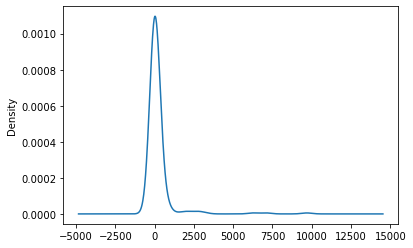

In [111]:
# Visualize the value counts of variety
variety_counts.plot.density()

In [112]:
replace_variety = list(variety_counts[variety_counts <= 300].index)

# Replace in dataframe
for variety in replace_variety:
    WestCoast_wine_data_title.variety = WestCoast_wine_data_title.variety.replace(variety,"Other")
    
# Check to make sure binning was successful
WestCoast_wine_data_title.variety.value_counts()

Pinot Noir                  9686
Cabernet Sauvignon          7104
Chardonnay                  6265
Other                       4221
Syrah                       3160
Red Blend                   2745
Zinfandel                   2702
Merlot                      2099
Sauvignon Blanc             2063
Bordeaux-style Red Blend    1639
Riesling                     926
Pinot Gris                   785
Petite Sirah                 733
Rose                         722
Viognier                     684
Rhone-style Red Blend        683
Cabernet Franc               626
Sparkling Blend              593
Grenache                     519
White Blend                  518
Malbec                       511
Sangiovese                   409
Pinot Grigio                 330
Tempranillo                  320
Name: variety, dtype: int64

In [113]:
# Remove varieties where variety count <= 300
WestCoast_wine_data_title = WestCoast_wine_data_title[WestCoast_wine_data_title.variety != "Other"]
print(WestCoast_wine_data_title.shape)
WestCoast_wine_data_title.head()

(45822, 8)


,points,price,province,region_1,winery,variety,title,description
2,87,14.0,Oregon,Willamette Valley,Rainstorm,Pinot Gris,Rainstorm 2013 Pinot Gris,"Tart and snappy, the flavors of lime flesh and..."
4,87,65.0,Oregon,Willamette Valley,Sweet Cheeks,Pinot Noir,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this..."
10,87,19.0,California,Napa Valley,Kirkland Signature,Cabernet Sauvignon,Kirkland Signature 2011 Mountain Cuvee Caberne...,"Soft, supple plum envelopes an oaky structure ..."
12,87,34.0,California,Alexander Valley,Louis M. Martini,Cabernet Sauvignon,Louis M. Martini 2012 Cabernet Sauvignon,"Slightly reduced, this wine offers a chalky, t..."
14,87,12.0,California,Central Coast,Mirassou,Chardonnay,Mirassou 2012 Chardonnay,Building on 150 years and six generations of w...


In [114]:
# Save cleaned dataframe
# All US data after drop Na
WestCoast_wine_data_title.to_csv("Data/US_wine_data.csv", index=False)

In [ ]:
# Import Dependencies for Database
from config import password
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import psycopg2

In [ ]:
db_string = f"postgresql+psycopg2://postgres:" + password + "@127.0.0.1:5434/WineEnthusiast"

In [ ]:
engine = create_engine(db_string)

In [ ]:
US_wine_data_df.to_sql(name='wine', con=engine, method='multi')